# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [4]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [7]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [8]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [9]:
# Extract all rows of data
table = soup.find('table', class_ = "table")
rows = table.find_all('tr')
rows

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

In [10]:
rows= table.find_all('tr')
rows

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Create an empty list
headers = []
row_data = []

# Loop through the scraped data to create a list of rows
for i, row in enumerate(table.find_all('tr')):
    if i == 0:
        headers = [el.text.strip() for el in row.find_all('th')]
    else:
        row_data.append([el.text.strip() for el in row.find_all('td')])
    

In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
table_df = pd.DataFrame(row_data, columns=headers)

In [13]:
# Confirm DataFrame was created successfully
table_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
table_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [15]:
# Change data types for data analysis

table_df['terrestrial_date'] = pd.to_datetime(table_df['terrestrial_date'])
table_df['sol'] = table_df['sol'].astype(int)
table_df['ls'] = table_df['ls'].astype(int)
table_df['month']=table_df['month'].astype(int)
table_df['min_temp'] = table_df['min_temp'].astype(float)
table_df['pressure'] = table_df['pressure'].astype(float)


In [16]:
# Confirm type changes were successful by examining data types again
table_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [19]:
# 1. How many months are there on Mars?
print(table_df['month'].value_counts())

month
4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: count, dtype: int64


In [106]:
# 2. How many Martian days' worth of data are there?
print(table_df['terrestrial_date'].count())

1867


In [112]:
# 3. What is the average low temperature by month?
average_month = table_df.groupby(['month'])["min_temp"].mean()
average_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

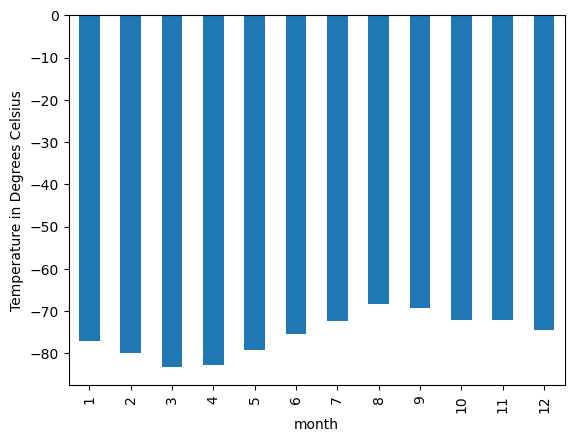

In [114]:
# Plot the average temperature by month
average_month.plot.bar()
plt.ylabel("Temperature in Degrees Celsius")
plt.show()

In [118]:
# Identify the coldest and hottest months in Curiosity's location
print(f' The coldest month is month {average_month.idxmin()} with an average temperature of {average_month.min()} degrees Celsius.')
print(f' The hotest month is month {average_month.idxmax()} with an average temperature of {average_month.max()} degrees Celsius.')


 The coldest month is month 3 with an average temperature of -83.30729166666667 degrees Celsius.
 The hotest month is month 8 with an average temperature of -68.38297872340425 degrees Celsius.


 The coldest month is month 3 with an average temperature of -83.31 degrees Celsius.
 The hotest month is month 8 with an average temperature of -68.38 degrees Celsius.

In [119]:
# 4. Average pressure by Martian month
avgp_month = table_df.groupby(['month'])["pressure"].mean()
avgp_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

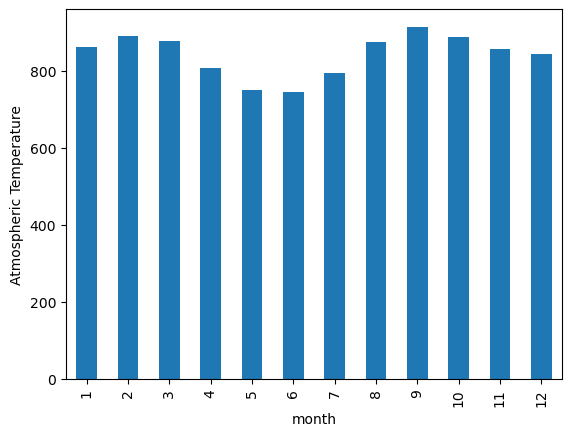

In [120]:
# Plot the average pressure by month
avgp_month.plot.bar()
plt.ylabel("Atmospheric Temperature")
plt.show()

In [121]:
# Identify the coldest and hottest months in Curiosity's location
print(f' The month with the lowest pressure is month {avgp_month.idxmin()} with an average atmospheric pressure of {avgp_month.min()} atm.')
print(f' The month with the highest pressure is month {avgp_month.idxmax()} with an average atmospheric pressure of {avgp_month.max()} atm.')


 The month with the lowest pressure is month 6 with an average atmospheric pressure of 745.0544217687075 atm.
 The month with the highest pressure is month 9 with an average atmospheric pressure of 913.3059701492538 atm.


The month with the lowest pressure is month 6 with an average atmospheric pressure of 745.05atm.
 The month with the highest pressure is month 9 with an average atmospheric pressure of 913.31 atm.

In [146]:
table_df_duration = table_df.copy()


In [147]:
table_df_duration['duration'] = ""


In [148]:
table_df_duration['duration'] = (table_df_duration['terrestrial_date']-table_df_duration['terrestrial_date'].iloc[0]).dt.days
table_df_duration

,id,terrestrial_date,sol,ls,month,min_temp,pressure,duration
0,2,2012-08-16,10,155,6,-75.0,739.0,0
1,13,2012-08-17,11,156,6,-76.0,740.0,1
2,24,2012-08-18,12,156,6,-76.0,741.0,2
3,35,2012-08-19,13,157,6,-74.0,732.0,3
4,46,2012-08-20,14,157,6,-74.0,740.0,4
...,...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0,2017
1863,1892,2018-02-24,1974,134,5,-77.0,729.0,2018
1864,1894,2018-02-25,1975,134,5,-76.0,729.0,2019
1865,1893,2018-02-26,1976,135,5,-77.0,728.0,2020


Text(0, 0.5, 'Minimum Temperatuture in Degrees Celsius')

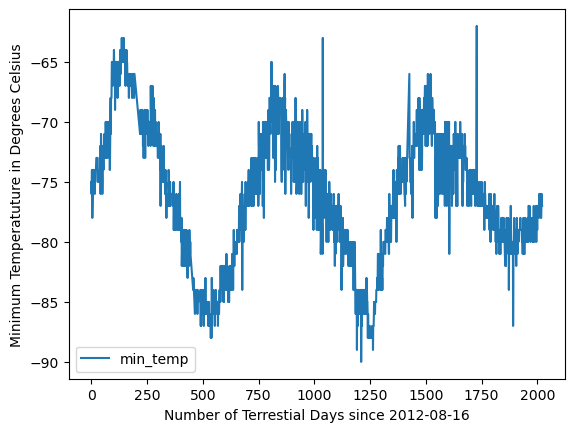

In [149]:
# 5. How many terrestrial (earth) days are there in a Martian year?

table_df_duration.plot(x='duration', y='min_temp')
plt.xlabel("Number of Terrestial Days since 2012-08-16")
plt.ylabel("Minimum Temperatuture in Degrees Celsius")




In [166]:
## Calculating the distance between the peaks to guess the number of earth days it takes Mars to complete a year
first_range = table_df_duration[table_df_duration['duration'].between(0,250)]
second_range = table_df_duration[table_df_duration['duration'].between(750,1000)]

first_peak = first_range.groupby(first_range['duration'])['min_temp'].mean().idxmax()
second_peak = second_range.groupby(second_range['duration'])['min_temp'].mean().idxmax()

peak_distance = second_peak - first_peak
print(f'First Peak: {first_peak}   Second Peak: {second_peak}  Peak Distance: {peak_distance}')

First Peak: 137   Second Peak: 807  Peak Distance: 670


If we assume there is a relative same temperature through each mars year we can use the peaks or maximum min_temperatures and the amount of days between them to guess the number of earth days it takes to Mars to complete a revolution around the sun.  We can determine the highest minimum temperature in the first peak between 0 and 250 days to occur 137 days since the first day and the second largest minimum temperature between 750 days and 1000 days since the first day and find it on day 807.  This gives a difference in the number of earth days between peaks to be 670 which is a good estimate in the number of earth days for a Mars Year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [167]:
# Write the data to a CSV
table_df_duration.to_csv("mars_table_data.csv")

In [21]:
browser.quit()